In [3]:
import pandas as pd

In [4]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

from src.data_preparation_workflow import load_dataset, get_features_and_target, create_train_test_split


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Test the flow
path = "../data/cleaned_data/final_dataset.csv"

df = load_dataset(path)
print(f"Loaded data: {df.shape}")

X, y = get_features_and_target(df)
print(f"Features: {X.shape}, Target: {y.shape}")

X_train, X_test, y_train, y_test = create_train_test_split(X, y, stratify_by="Seniority")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Loaded data: (366, 12)
Features: (366, 11), Target: (366,)
Train: (292, 11), Test: (74, 11)


In [6]:
X_train

,Gender,Education Level,Seniority,Area,Role,Age,Years of Experience,noun_count,verb_count,adj_count,adv_count
119,Female,Bachelor's,Senior,Sales & Marketing,Management,42.0,17.0,34,15,7,4
345,Female,Bachelor's,Junior,Business,Individual Contributor,31.0,3.0,28,15,6,2
223,Female,Master's,Director,People & Support,Leadership,51.0,21.0,27,9,7,1
292,Female,Master's,Director,People & Support,Support,48.0,20.0,32,11,10,1
142,Female,Master's,Junior,Sales & Marketing,Support,25.0,1.5,23,13,6,1
...,...,...,...,...,...,...,...,...,...,...,...
277,Female,PhD,Senior,Product & Design,Creative,44.0,15.0,37,14,10,0
4,Male,Master's,Senior,Other,Leadership,52.0,20.0,23,16,8,3
16,Female,Master's,Senior,Sales & Marketing,Management,33.0,7.0,31,17,10,2
190,Female,Master's,Senior,People & Support,Support,40.0,13.0,26,9,10,1


---

# Dummy model

In [7]:
from src import dummy_model

In [8]:
# Create and train dummy model
dummy = dummy_model(strategy='median')
dummy.fit(X_train, y_train)

In [9]:
metrics = dummy.evaluate(X_test, y_test)
metrics

Model metrics updated with 3 metrics


,metric,point_estimate,95%_CI
0,RMSE,51880.189418,"(45282.159, 61045.194)"
1,MAE,42500.000000,"(36093.220, 49940.678)"
2,R2,-0.028127,"(-0.141, -0.000)"


In [10]:
# Model info
info = dummy.get_model_info()
print(f"Model info: {info}")

Model info: {'model_type': 'dummy_model', 'is_fitted': True, 'model_params': {'strategy': 'median'}}


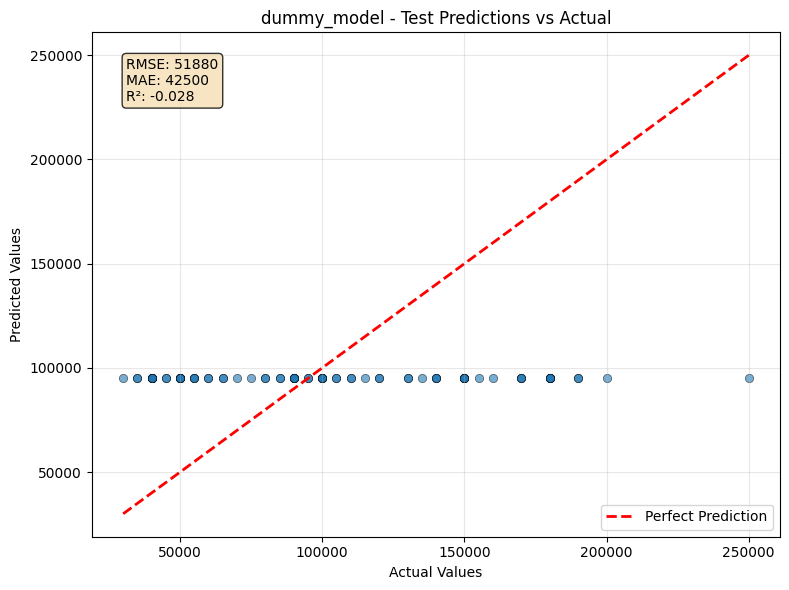

In [11]:
# Evaluate and plot
#print("Dummy Model Metrics:", dummy.evaluate(X_test, y_test))
dummy.plot_predictions(X_test, y_test, 'Test')


---

# Linear Regression

- Approaches. 
  - Ordinary Least Squares (OLS)
  - Gradient Descent
- Assumptions.
    - Linearity
    - Independence
    - Homoscedasticity
    - Normality of errors
- Evaluation metrics.
    - R-squared
    - Adjusted R-squared
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
- Regularization.
    - Lasso Regression (L1 regularization)
    - Ridge Regression (L2 regularization)



In [12]:
from src.models import LinearModel

### Basic OLS

In [13]:
# Basic OLS without feature selection
ols_basic = LinearModel(algorithm='ols')
ols_basic.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
After k-best selection: 27 features
Removed feature_0 (VIF: 143.01)
Removed feature_12 (VIF: 27.19)
Removed feature_1 (VIF: 15.80)
Removed feature_3 (VIF: 14.68)
Removed feature_2 (VIF: 11.63)
Removed feature_4 (VIF: 6.86)
After VIF check: 21 features


In [14]:
ols_basic.list_methods()

Available public methods:
  1. evaluate()
  2. explain_prediction()
  3. fit()
  4. get_api_info()
  5. get_feature_importance()
  6. get_feature_names()
  7. get_model_info()
  8. get_model_metrics()
  9. list_methods()
  10. load()
  11. plot_predictions()
  12. predict()
  13. predict_api_input()
  14. save()
  15. set_feature_names()
  16. set_model_metrics()


In [15]:
# Evaluate
metrics_ols = ols_basic.evaluate(X_test, y_test)
metrics_ols


Model metrics updated with 3 metrics

/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

,metric,point_estimate,95%_CI
0,RMSE,29088.821975,"(17182.707, 38570.365)"
1,MAE,17480.156725,"(12075.941, 22997.967)"
2,R2,0.676782,"(0.487, 0.871)"


In [16]:
# Model info
info = ols_basic.get_model_info()
print(f"Features: {info['n_features_after_encoding']} → {info['n_features_final']}")

Features: 27 → 21


In [17]:
feature_imp = ols_basic.get_feature_importance()
feature_imp


,feature,coefficient,abs_coefficient
19,cat__Role_Other,56770.167712,56770.167712
17,cat__Role_Leadership,54504.790272,54504.790272
3,cat__Education Level_PhD,49971.548463,49971.548463
5,cat__Seniority_Junior,-47587.614227,47587.614227
18,cat__Role_Management,15690.460642,15690.460642
2,cat__Education Level_Master's,13165.971417,13165.971417
4,cat__Seniority_Director,12177.341499,12177.341499
9,cat__Area_Other,-10365.102816,10365.102816
16,cat__Role_Individual Contributor,-9531.633169,9531.633169
8,cat__Area_Management,-9454.204973,9454.204973


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


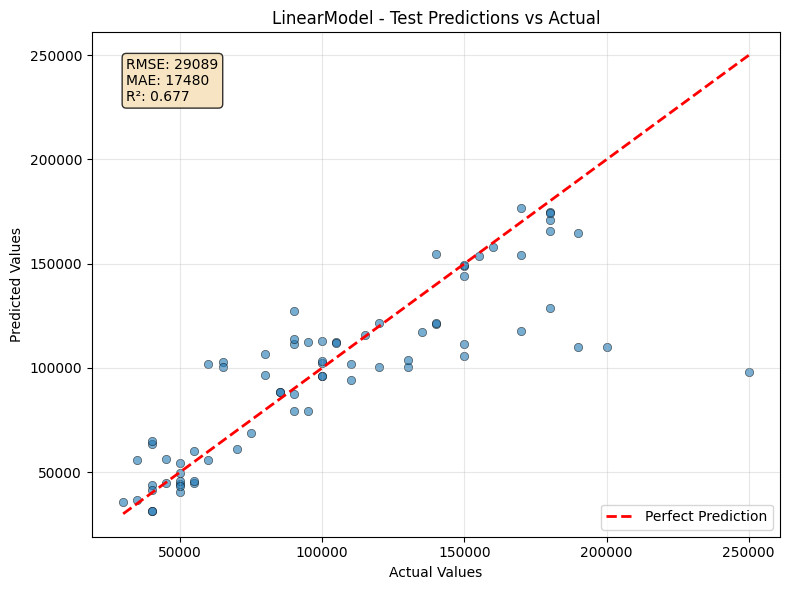

In [18]:
ols_basic.plot_predictions(X_test, y_test, 'Test')

Linear Model SHAP Test:
Prediction: $112,437.58
Base value: $98,045.57
SHAP values shape: 21



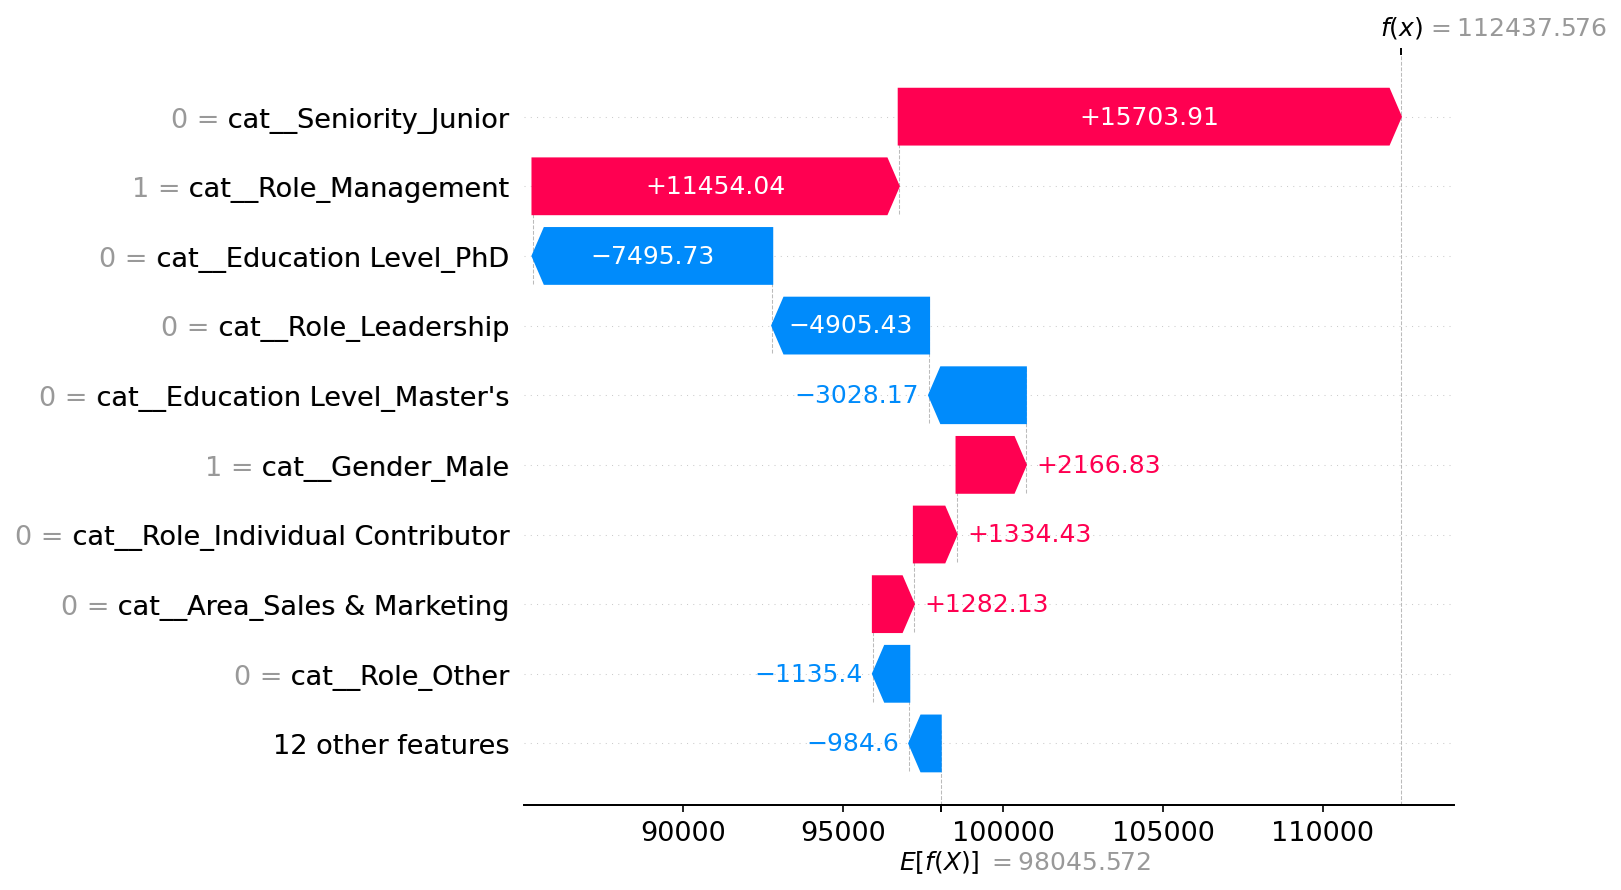

In [19]:
# Test explain_prediction
test_input = X_test.iloc[:1]  # Single row for testing
explanation = ols_basic.explain_prediction(test_input)

print("Linear Model SHAP Test:")
print(f"Prediction: ${explanation['prediction']:,.2f}")
print(f"Base value: ${explanation['base_value']:,.2f}")
print(f"SHAP values shape: {len(explanation['shap_values'])}")

# Display the plot
from IPython.display import HTML
HTML(f'<img src="{explanation["shap_plot"]}" width="600">')

In [20]:
ols_basic.save("OLS_basic")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/OLS_basic.pkl


---

### SGD Regression


In [21]:
sgd_reg = LinearModel(algorithm='sgd')
sgd_reg.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
After k-best selection: 27 features
Removed feature_0 (VIF: 143.01)
Removed feature_12 (VIF: 27.19)
Removed feature_1 (VIF: 15.80)
Removed feature_3 (VIF: 14.68)
Removed feature_2 (VIF: 11.63)
Removed feature_4 (VIF: 6.86)
After VIF check: 21 features


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [22]:
# Evaluate
metrics_sgd = sgd_reg.evaluate(X_test, y_test)
metrics_sgd


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

Model metrics updated with 3 metrics


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

,metric,point_estimate,95%_CI
0,RMSE,28894.415856,"(16978.663, 38480.594)"
1,MAE,17384.445118,"(12143.940, 23067.661)"
2,R2,0.681087,"(0.490, 0.872)"


In [23]:
feature_imp_sgd = sgd_reg.get_feature_importance()
feature_imp_sgd

,feature,coefficient,abs_coefficient
3,cat__Education Level_PhD,50849.571054,50849.571054
17,cat__Role_Leadership,49145.162729,49145.162729
5,cat__Seniority_Junior,-47720.994099,47720.994099
19,cat__Role_Other,44461.060626,44461.060626
4,cat__Seniority_Director,17668.062055,17668.062055
18,cat__Role_Management,13819.033238,13819.033238
2,cat__Education Level_Master's,13237.806952,13237.806952
16,cat__Role_Individual Contributor,-9547.982743,9547.982743
13,cat__Area_Software/data,9254.283978,9254.283978
9,cat__Area_Other,-6226.852672,6226.852672


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


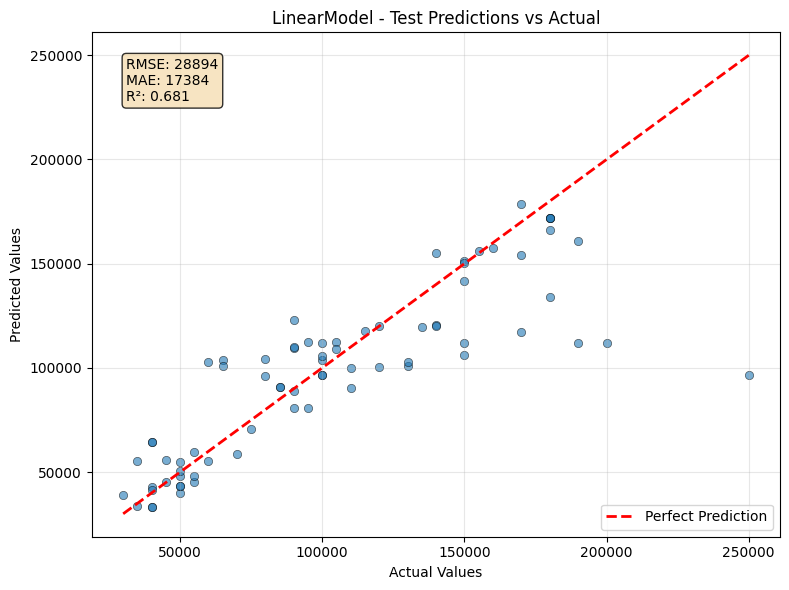

In [24]:
sgd_reg.plot_predictions(X_test, y_test, 'Test')

In [25]:
sgd_reg.save("SGD_Regression")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/SGD_Regression.pkl


---

### Lasso Regression

In [26]:
lasso_reg = LinearModel(algorithm='lasso', alpha = 100, k_best=15)
lasso_reg.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
Selected 15 best features from 27 features
After k-best selection: 15 features
Removed feature_0 (VIF: 133.42)
Removed feature_9 (VIF: 18.08)
Removed feature_3 (VIF: 13.00)
Removed feature_1 (VIF: 10.75)
Removed feature_2 (VIF: 6.82)
After VIF check: 10 features


In [27]:
metrics_lasso = lasso_reg.evaluate(X_test, y_test)
metrics_lasso


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

Model metrics updated with 3 metrics


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

,metric,point_estimate,95%_CI
0,RMSE,28520.049615,"(17347.538, 37914.919)"
1,MAE,17362.723897,"(12193.350, 22918.187)"
2,R2,0.689298,"(0.501, 0.866)"


In [28]:
# Model info
info = lasso_reg.get_model_info()
print(f"Features: {info['n_features_after_encoding']} → {info['n_features_final']}")

Features: 27 → 10


In [29]:
feature_imp_lasso = lasso_reg.get_feature_importance()
feature_imp_lasso

,feature,coefficient,abs_coefficient
4,cat__Seniority_Junior,-51087.469065,51087.469065
7,cat__Role_Leadership,45588.503139,45588.503139
8,cat__Role_Other,42448.146972,42448.146972
2,cat__Education Level_PhD,41846.439006,41846.439006
3,cat__Seniority_Director,15421.672069,15421.672069
6,cat__Role_Individual Contributor,-14767.057973,14767.057973
9,cat__Role_Support,-11110.083092,11110.083092
1,cat__Education Level_Master's,10653.740217,10653.740217
5,cat__Area_Software/data,5843.308650,5843.308650
0,num__adj_count,-754.402613,754.402613


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


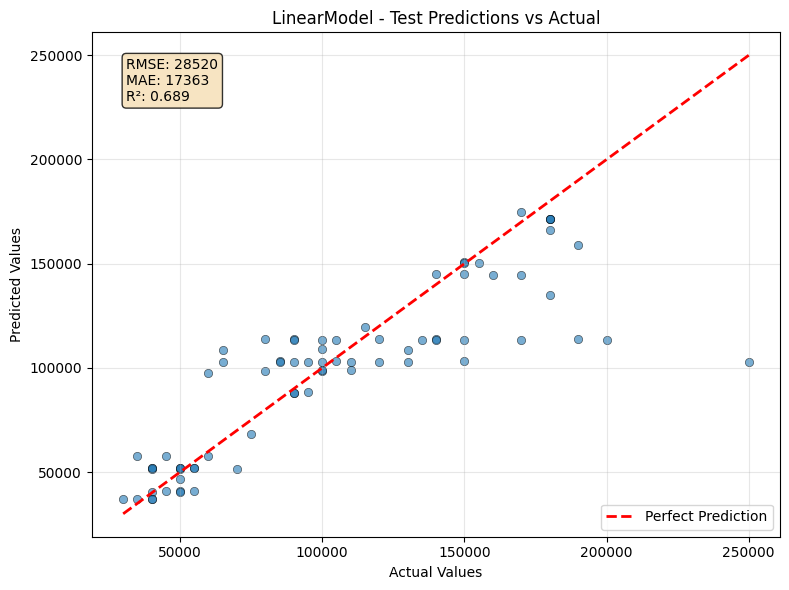

In [30]:
lasso_reg.plot_predictions(X_test, y_test, 'Test')

In [31]:
lasso_reg.get_model_info()

{'model_type': 'LinearModel',
 'is_fitted': True,
 'model_params': {'alpha': 100,
  'algorithm': 'lasso',
  'vif_threshold': 5.0,
  'k_best': 15},
 'n_features_after_encoding': 27,
 'n_features_after_kbest': 15,
 'n_features_final': 10,
 'n_numerical_features_scaled': 6,
 'n_onehot_features_not_scaled': 21,
 'features_removed_by_kbest': 12,
 'features_removed_by_vif': 5}

In [32]:
lasso_reg.save("Lasso_Regression")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/Lasso_Regression.pkl


---

# Decision Tree with Cross-Validation

Testing the new cross-validation functionality in DecisionTree model.

In [33]:
from src.models import DecisionTree

### Regular Training

In [34]:
# Create decision tree with ordinal mappings
ordinal_mappings = {
    'Education Level': ["Bachelor's", "Master's", 'PhD'],
    'Seniority': ['Junior', 'Senior', 'Principal','Director', 'C-level']
}

dt_regular = DecisionTree(normalize=True, ordinal_mappings=ordinal_mappings, max_depth=10)


In [35]:
dt_regular.list_methods()

Available public methods:
  1. cross_validate()
  2. evaluate()
  3. explain_prediction()
  4. fit()
  5. get_api_info()
  6. get_feature_importance()
  7. get_feature_names()
  8. get_model_info()
  9. get_model_metrics()
  10. list_methods()
  11. load()
  12. optimize()
  13. plot_predictions()
  14. predict()
  15. predict_api_input()
  16. save()
  17. set_feature_names()
  18. set_model_metrics()


In [36]:
dt_regular.fit(X_train, y_train)

After preprocessing: 23 features
  - Ordinal encoded: ['Education Level', 'Seniority']
  - One-hot encoded: ['Gender', 'Area', 'Role']
  - Numerical features: 6
  - Features normalized


In [37]:
# Evaluate on test set
metrics_dt = dt_regular.evaluate(X_test, y_test)
metrics_dt

/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

Model metrics updated with 3 metrics


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

,metric,point_estimate,95%_CI
0,RMSE,19321.682673,"(14508.436, 22995.075)"
1,MAE,12816.581842,"(9016.199, 15625.197)"
2,R2,0.857395,"(0.783, 0.919)"


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


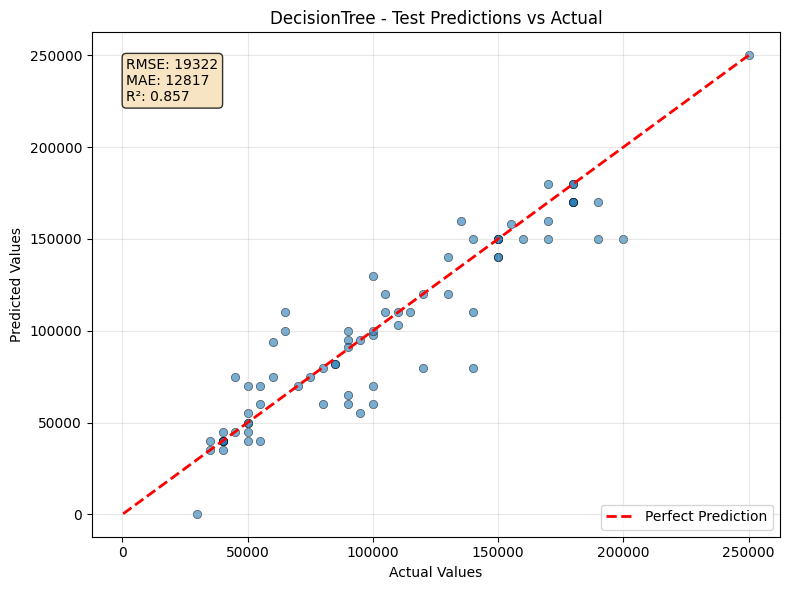

In [38]:
dt_regular.plot_predictions(X_test, y_test, 'Test')

### Cross-Validation

In [39]:
# Same model but using cross-validation with RMSE
cv_results = dt_regular.cross_validate(X_train, y_train, cv=5)

Cross-Validation Results (5-fold):
  RMSE: 17492.20 (±2220.55)
  Individual fold scores: ['17011.50', '15323.75', '21728.85', '17204.22', '16192.66']


In [40]:
# Compare with R² scoring
cv_results_r2 = dt_regular.cross_validate(X_train, y_train, cv=5, scoring='r2')
print(f"\nCV Results Summary:")
print(f"RMSE: {cv_results['mean_score']:.0f} (±{cv_results['std_score']:.0f})")
print(f"R²: {cv_results_r2['mean_score']:.3f} (±{cv_results_r2['std_score']:.3f})")

Cross-Validation Results (5-fold):
  R²: 0.86 (±0.04)
  Individual fold scores: ['0.89', '0.88', '0.78', '0.87', '0.89']

CV Results Summary:
RMSE: 17492 (±2221)
R²: 0.861 (±0.040)


### Grid Search

In [41]:
dt_regular.optimize(X_train, y_train)

Starting gridsearch for hyperparameter tuning...

Best score: 15076.56
Best params: {'regressor__ccp_alpha': 0.0, 'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5}
Updated parameters: {'ccp_alpha': 0.0, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Model parameters updated with best found parameters.
You can now use fit() or cross_validate() with the optimized parameters.
Best score: 15076.56
Best params: {'regressor__ccp_alpha': 0.0, 'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5}
Updated parameters: {'ccp_alpha': 0.0, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Model parameters updated with best found parameters.
You can now use fit() or cross_validate() with the optimized parameters.


,estimator,Pipeline(step...m_state=37))])
,param_grid,"{'regressor__ccp_alpha': [0.0, 0.01, ...], 'regressor__max_depth': [3, 5, ...], 'regressor__max_features': ['sqrt', 'log2', ...], 'regressor__min_samples_leaf': [1, 2, ...], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ord_Education Level', ...), ('ord_Seniority', ...), ...]"


In [42]:
dt_regular.fit(X_train, y_train)

After preprocessing: 23 features
  - Ordinal encoded: ['Education Level', 'Seniority']
  - One-hot encoded: ['Gender', 'Area', 'Role']
  - Numerical features: 6
  - Features normalized


In [43]:
dt_regular.evaluate(X_test, y_test)

/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

Model metrics updated with 3 metrics


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

,metric,point_estimate,95%_CI
0,RMSE,13910.971290,"(10757.100, 17400.733)"
1,MAE,10222.192690,"(7892.649, 13075.768)"
2,R2,0.926081,"(0.884, 0.957)"


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


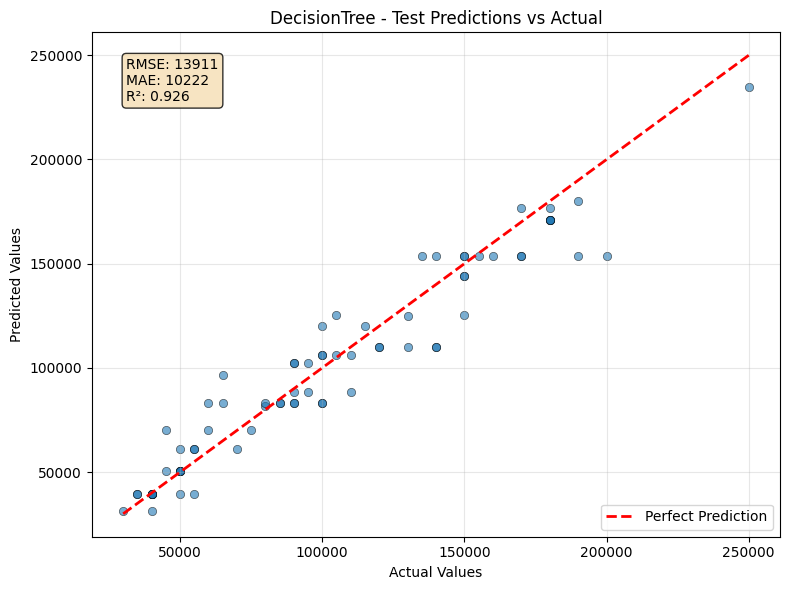

In [44]:
dt_regular.plot_predictions(X_test, y_test, 'Test')

In [45]:
dt_regular.get_feature_importance()

,feature,importance
3,num__Years of Experience,0.882185
1,ord_Seniority__Seniority,0.049218
2,num__Age,0.018990
0,ord_Education Level__Education Level,0.017603
8,cat__Gender_Male,0.009703
20,cat__Role_Management,0.009087
19,cat__Role_Leadership,0.008504
10,cat__Area_Management,0.002237
15,cat__Area_Software/data,0.001139
4,num__noun_count,0.000556


In [46]:
dt_regular.get_model_metrics()

,metric,point_estimate,95%_CI
0,RMSE,13910.971290,"(10757.100, 17400.733)"
1,MAE,10222.192690,"(7892.649, 13075.768)"
2,R2,0.926081,"(0.884, 0.957)"


Decision Tree SHAP Test:
Prediction: $102,142.86
Base value: $100,292.29
SHAP values shape: 23
Feature names available: True



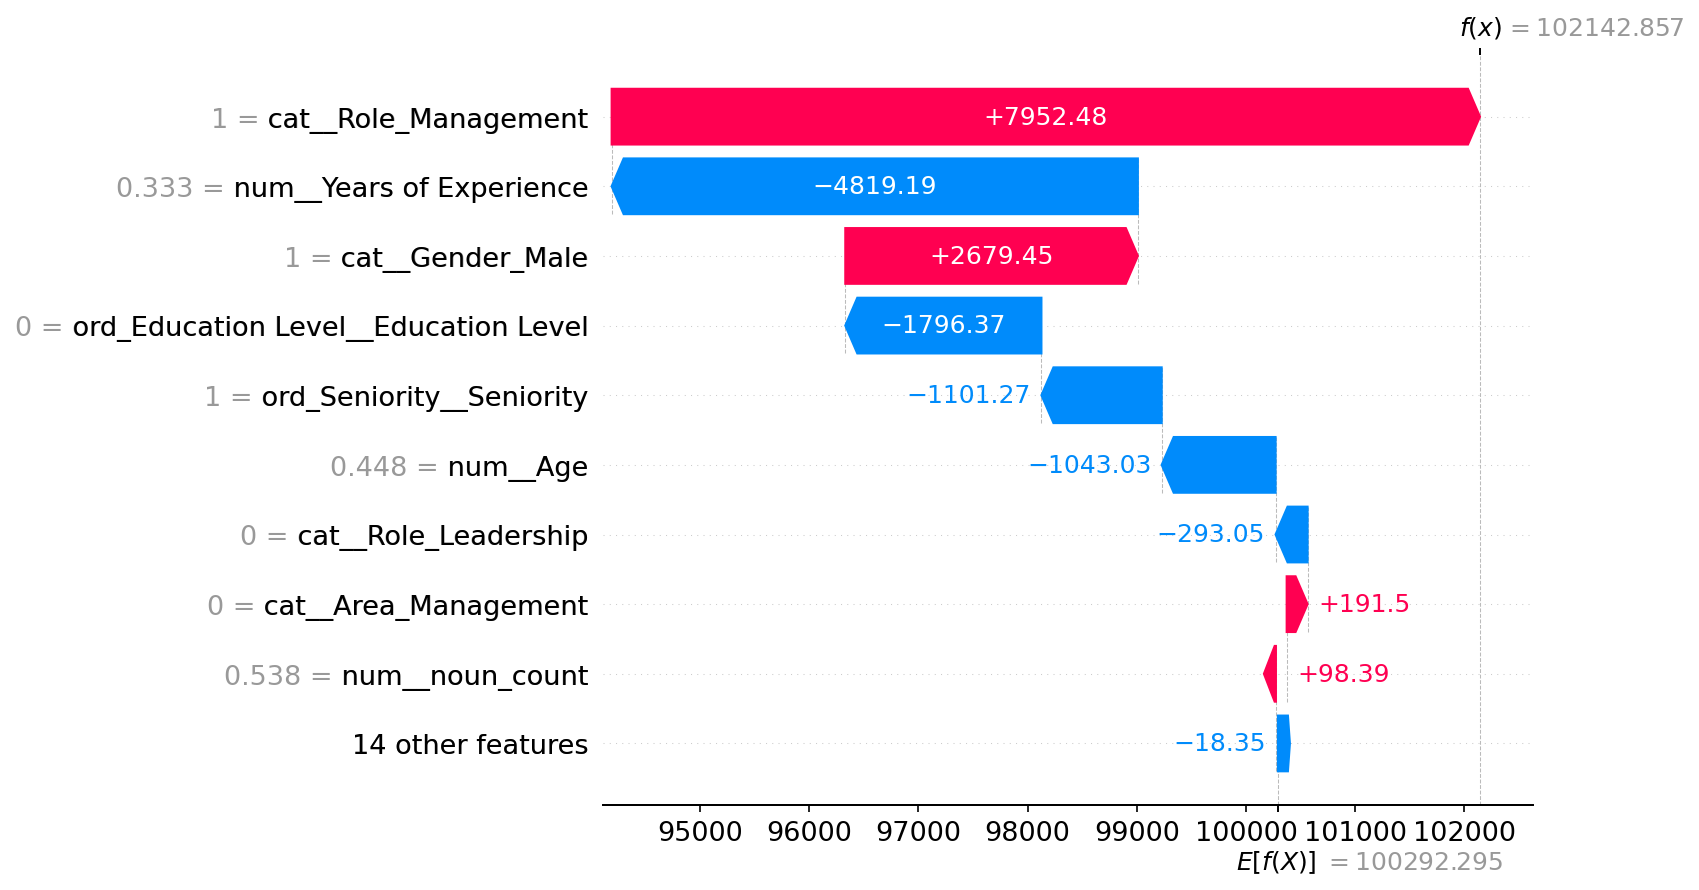

In [47]:
# Test SHAP explanation for Decision Tree
test_input_dt = X_test.iloc[:1]  # Single row for testing
explanation_dt = dt_regular.explain_prediction(test_input_dt)

print("Decision Tree SHAP Test:")
print(f"Prediction: ${explanation_dt['prediction']:,.2f}")
print(f"Base value: ${explanation_dt['base_value']:,.2f}")
print(f"SHAP values shape: {len(explanation_dt['shap_values'])}")
print(f"Feature names available: {explanation_dt['feature_names'] is not None}")

# Display the plot
from IPython.display import HTML
HTML(f'<img src="{explanation_dt["shap_plot"]}" width="600">')

In [48]:
# dt_regular.save("DecisionTree_GSopt")

---

# Random Forest

In [49]:
from src.models import RandomForest

In [50]:
rf = RandomForest(normalize=True, ordinal_mappings=ordinal_mappings, max_features="sqrt")

In [51]:
rf.get_model_info()

{'model_type': 'RandomForest',
 'is_fitted': False,
 'model_params': {'max_features': 'sqrt',
  'normalize': True,
  'ordinal_mappings': {},
  'random_state': 37,
  'max_depth': None,
  'min_samples_split': 2,
  'min_samples_leaf': 1}}

In [52]:
rf.fit(X_train, y_train)

After preprocessing: 27 features
  - Ordinal encoded: []
  - One-hot encoded: ['Gender', 'Education Level', 'Seniority', 'Area', 'Role']
  - Numerical features: 6


In [53]:
rf.list_methods()

Available public methods:
  1. cross_validate()
  2. evaluate()
  3. explain_prediction()
  4. fit()
  5. get_api_info()
  6. get_feature_importance()
  7. get_feature_names()
  8. get_model_info()
  9. get_model_metrics()
  10. list_methods()
  11. load()
  12. optimize()
  13. plot_predictions()
  14. predict()
  15. predict_api_input()
  16. save()
  17. set_feature_names()
  18. set_model_metrics()


In [54]:
rf.evaluate(X_test, y_test)

/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

Model metrics updated with 3 metrics


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

,metric,point_estimate,95%_CI
0,RMSE,17595.023242,"(12388.106, 23357.402)"
1,MAE,11257.175676,"(7887.286, 15001.157)"
2,R2,0.881744,"(0.797, 0.941)"


In [55]:
rf.cross_validate(X_train, y_train, cv=5)

Cross-Validation Results (5-fold):
  RMSE: 13557.80 (±2268.06)
  Individual fold scores: ['15198.07', '11297.69', '17196.64', '12296.91', '11799.69']


{'cv_scores': array([15198.06800835, 11297.6933222 , 17196.6430519 , 12296.91161199,
        11799.68646574]),
 'mean_score': np.float64(13557.800492034055),
 'std_score': np.float64(2268.062733566329),
 'score_name': 'RMSE',
 'cv_folds': 5}

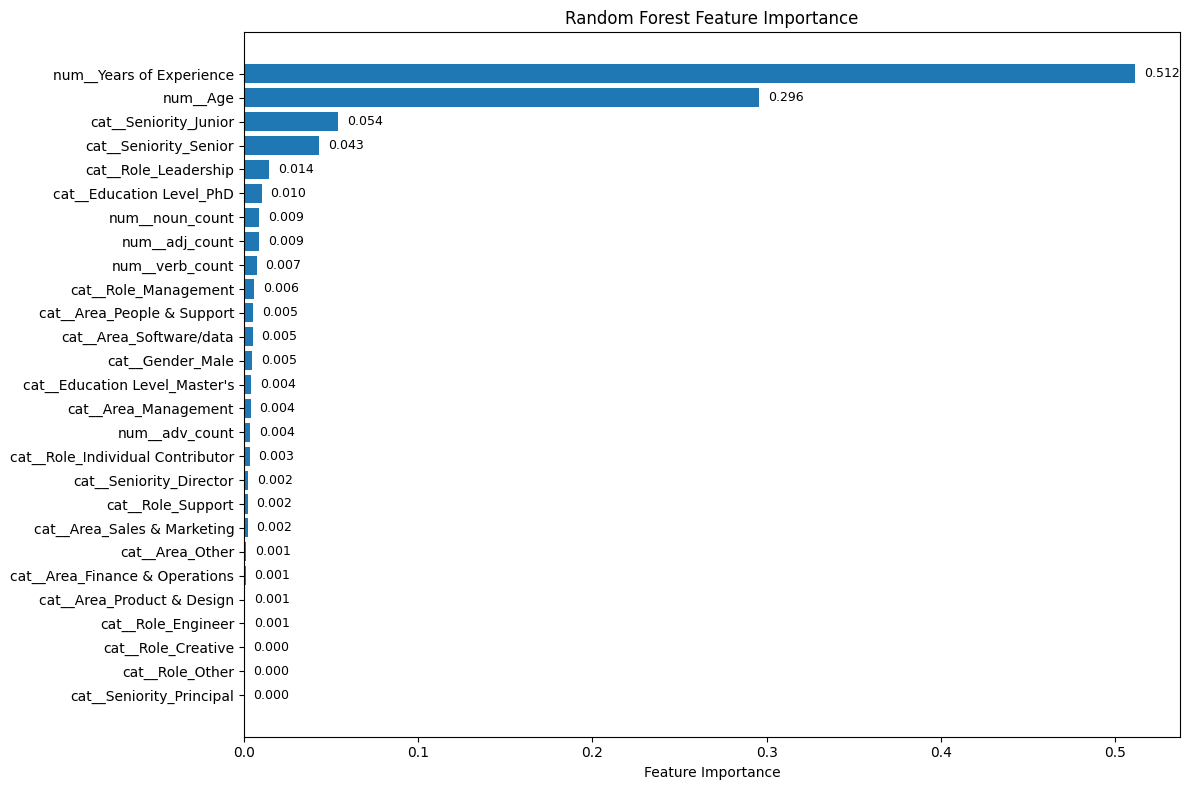

In [56]:
import matplotlib.pyplot as plt

# Get feature importance and create bar plot
feature_imp_rf = rf.get_feature_importance()

plt.figure(figsize=(12, 8))
plt.barh(feature_imp_rf['feature'], feature_imp_rf['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # To show most important features at the top
plt.tight_layout()
# Add value labels to the bars
for i, v in enumerate(feature_imp_rf['importance']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

plt.show()

/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


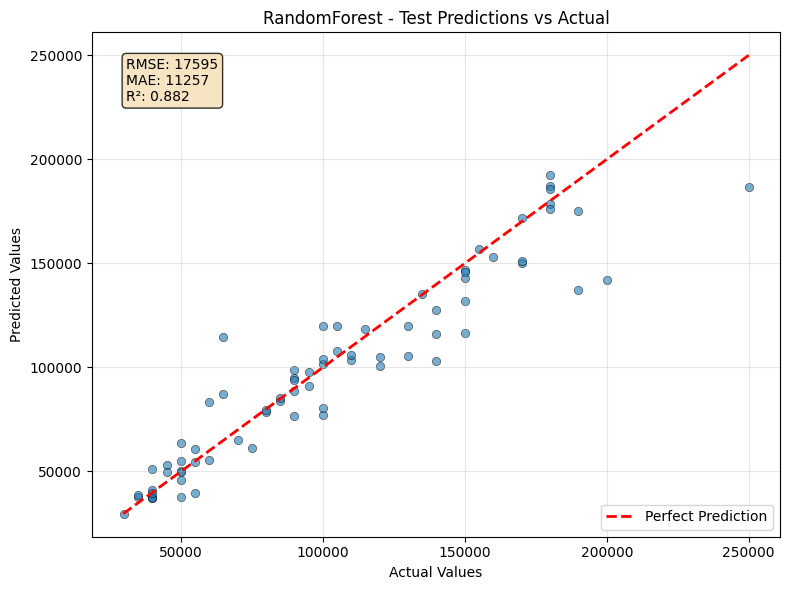

In [57]:
rf.plot_predictions(X_test, y_test, 'Test')

Random Forest SHAP Test:
Prediction: $97,900.00
Base value: $100,502.58
SHAP values shape: 27
Feature names available: True



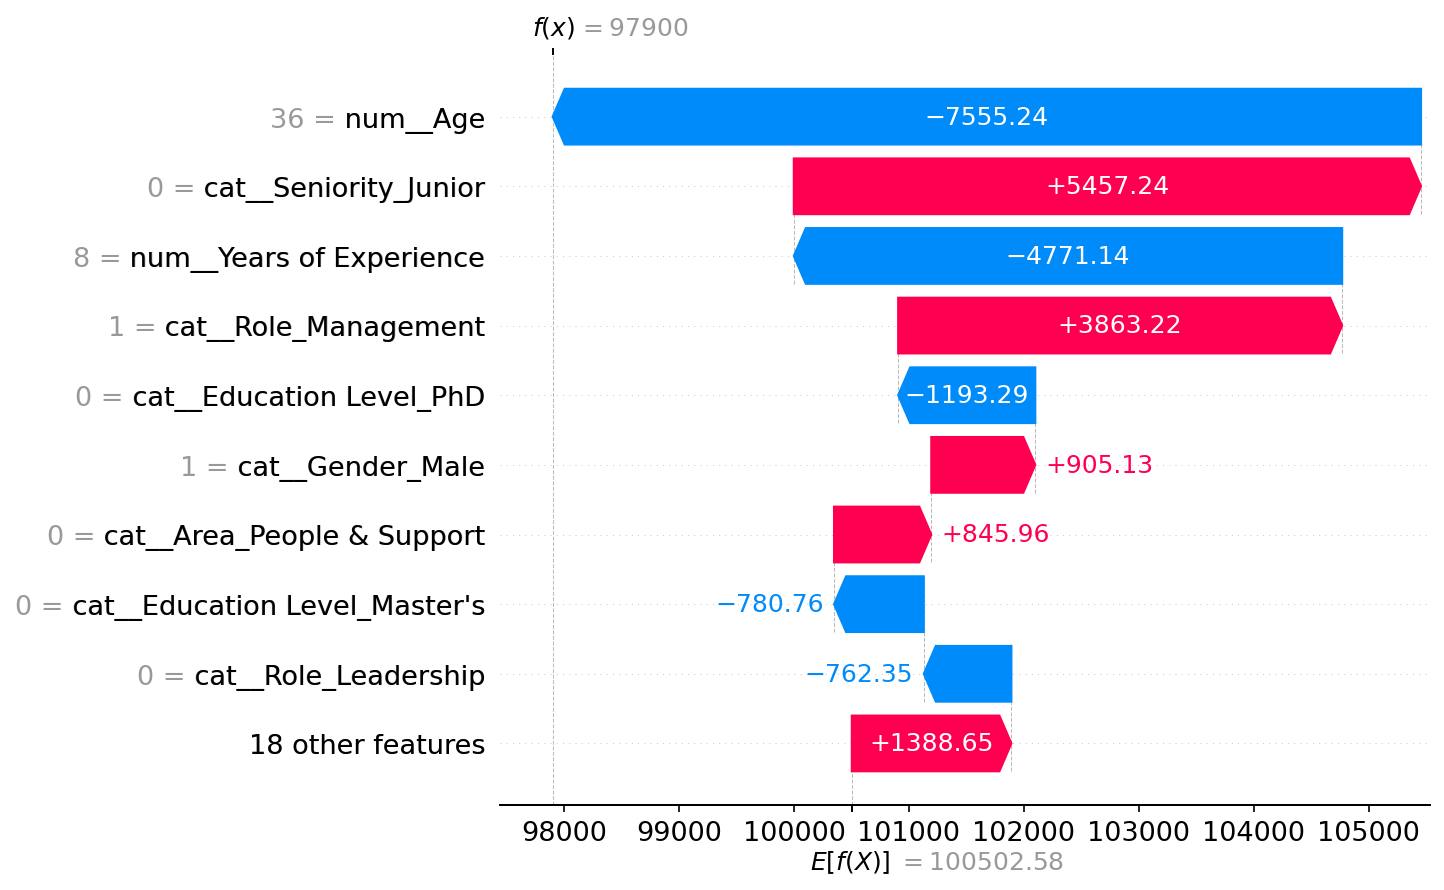

In [58]:
# Test SHAP explanation for Random Forest
test_input_rf = X_test.iloc[:1]  # Single row for testing
explanation_rf = rf.explain_prediction(test_input_rf)

print("Random Forest SHAP Test:")
print(f"Prediction: ${explanation_rf['prediction']:,.2f}")
print(f"Base value: ${explanation_rf['base_value']:,.2f}")
print(f"SHAP values shape: {len(explanation_rf['shap_values'])}")
print(f"Feature names available: {explanation_rf['feature_names'] is not None}")

# Display the plot
HTML(f'<img src="{explanation_rf["shap_plot"]}" width="600">')

---

## Random forest drop Age

In [59]:
X_train_na = X_train.drop(columns=["Age","Years of Experience"], axis=1)

In [60]:
df_na = RandomForest(normalize=True, ordinal_mappings=ordinal_mappings, max_features="sqrt")

In [61]:
df_na.fit(X_train_na, y_train)

After preprocessing: 25 features
  - Ordinal encoded: []
  - One-hot encoded: ['Gender', 'Education Level', 'Seniority', 'Area', 'Role']
  - Numerical features: 4


In [62]:
df_na.evaluate(X_test, y_test)

/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

Model metrics updated with 3 metrics


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

,metric,point_estimate,95%_CI
0,RMSE,26746.093390,"(17878.383, 36991.770)"
1,MAE,16392.148649,"(11878.259, 23218.445)"
2,R2,0.726747,"(0.505, 0.855)"


In [63]:
df_na.get_feature_importance()

,feature,importance
8,cat__Seniority_Junior,0.540061
10,cat__Seniority_Senior,0.102819
21,cat__Role_Leadership,0.089995
6,cat__Education Level_PhD,0.089443
0,num__noun_count,0.029890
1,num__verb_count,0.023715
2,num__adj_count,0.021037
22,cat__Role_Management,0.021001
7,cat__Seniority_Director,0.014129
3,num__adv_count,0.009481


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


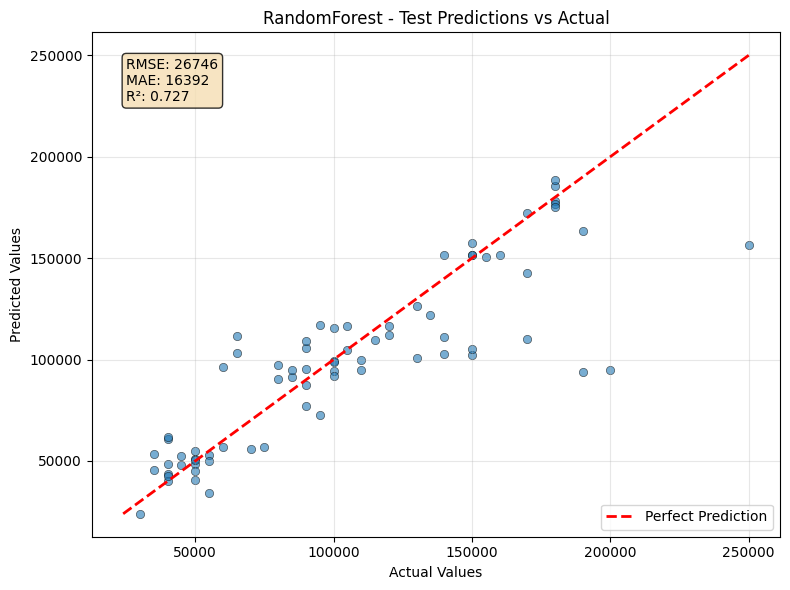

In [64]:
df_na.plot_predictions(X_test, y_test, 'Test')

Random Forest (No Age/Experience) SHAP Test:
Prediction: $116,850.00
Base value: $100,502.58
SHAP values shape: 25
Feature names available: True



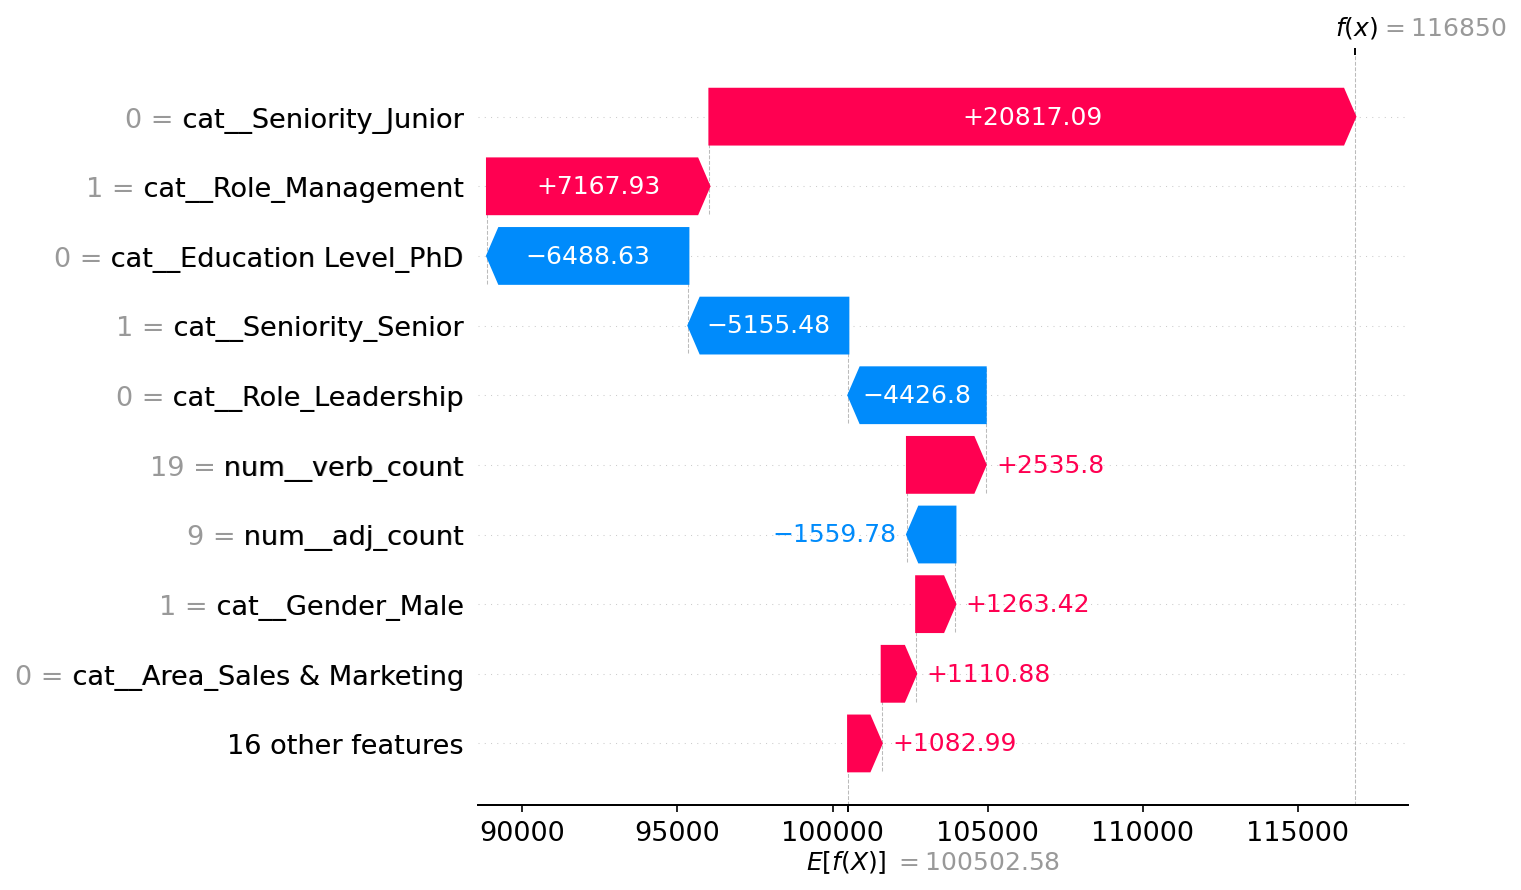

In [65]:
# Test SHAP explanation for Random Forest (no Age/Experience)
test_input_na = X_test.drop(columns=["Age","Years of Experience"], axis=1).iloc[:1]
explanation_na = df_na.explain_prediction(test_input_na)

print("Random Forest (No Age/Experience) SHAP Test:")
print(f"Prediction: ${explanation_na['prediction']:,.2f}")
print(f"Base value: ${explanation_na['base_value']:,.2f}")
print(f"SHAP values shape: {len(explanation_na['shap_values'])}")
print(f"Feature names available: {explanation_na['feature_names'] is not None}")

# Display the plot
HTML(f'<img src="{explanation_na["shap_plot"]}" width="600">')

---

## Random forest bayesian optimization

In [66]:
opt_study = rf.optimize(X_train, y_train, trials = 150)

[I 2025-06-29 21:14:02,492] A new study created in memory with name: no-name-e471e1c2-cccd-4407-a89b-aa8d0ff87024
[I 2025-06-29 21:14:02,648] Trial 0 finished with value: 22104.479103283764 and parameters: {'n_estimators': 254, 'max_depth': 2, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 22104.479103283764.
[I 2025-06-29 21:14:02,648] Trial 0 finished with value: 22104.479103283764 and parameters: {'n_estimators': 254, 'max_depth': 2, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 22104.479103283764.
[I 2025-06-29 21:14:02,835] Trial 1 finished with value: 16330.845206404494 and parameters: {'n_estimators': 286, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 16330.845206404494.
[I 2025-06-29 21:14:02,835] Trial 1 finished with value: 16330.845206404494 and parameters: {'n_estimators': 286, 'max_depth': 4, 'min

Best parameters: {'n_estimators': 201, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best score: 13375.92
After preprocessing: 27 features
  - Ordinal encoded: []
  - One-hot encoded: ['Gender', 'Education Level', 'Seniority', 'Area', 'Role']
  - Numerical features: 6


In [67]:
rf.evaluate(X_test, y_test)

/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

Model metrics updated with 3 metrics


/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria

,metric,point_estimate,95%_CI
0,RMSE,18324.087142,"(11647.925, 25265.802)"
1,MAE,11327.861451,"(8227.095, 15752.538)"
2,R2,0.871741,"(0.783, 0.936)"


In [68]:
rf.get_model_info()

{'model_type': 'RandomForest',
 'is_fitted': True,
 'model_params': {'max_features': 'sqrt',
  'normalize': True,
  'ordinal_mappings': {},
  'random_state': 37,
  'max_depth': 13,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'n_estimators': 201}}

/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/frank/maestria_mcd/PwC/pwcc/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


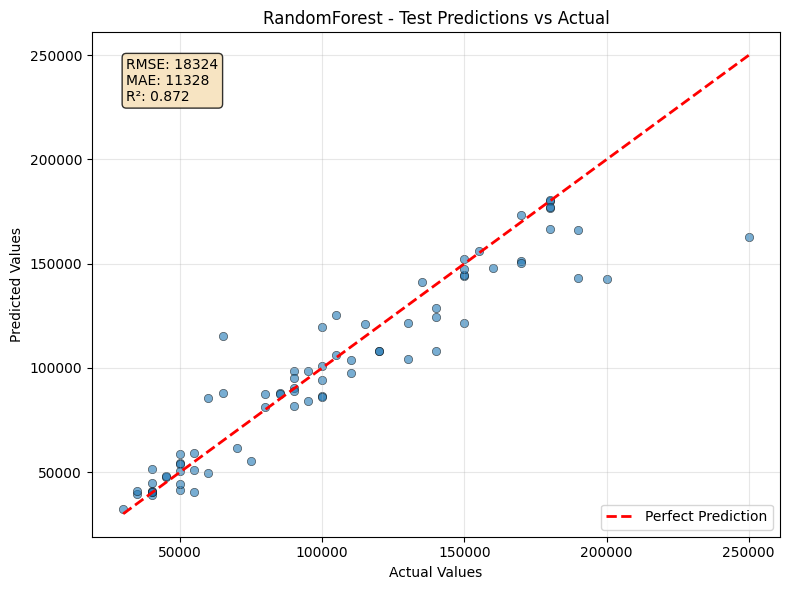

In [69]:
rf.plot_predictions(X_test, y_test, 'Test')

Optimized Random Forest SHAP Test:
Prediction: $98,327.66
Base value: $100,502.58
SHAP values shape: 27
Feature names available: True



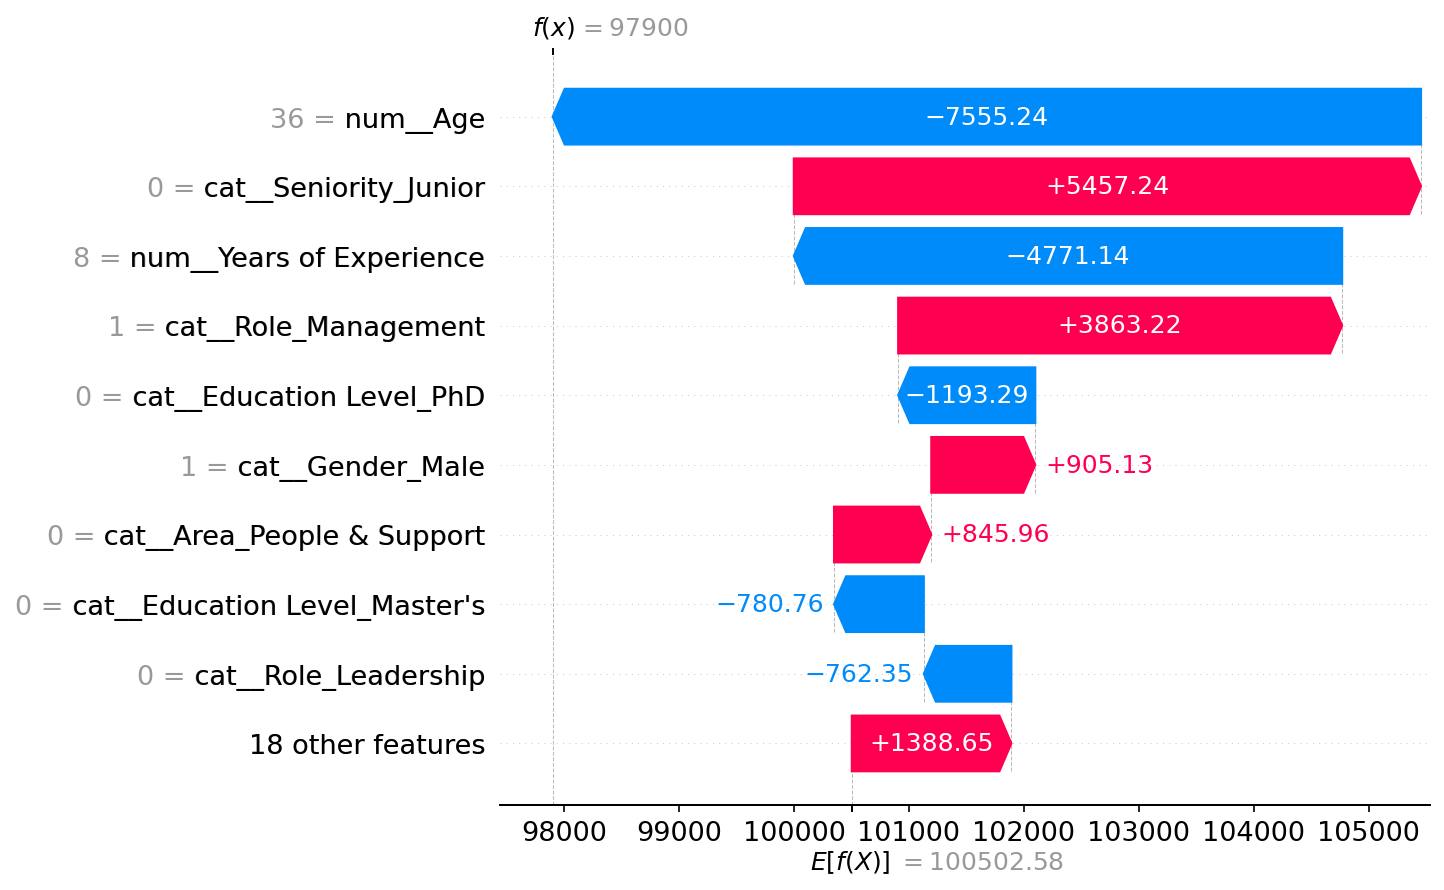

In [70]:
# Test SHAP explanation for Optimized Random Forest
test_input_opt = X_test.iloc[:1]  # Single row for testing
explanation_opt = rf.explain_prediction(test_input_opt)

print("Optimized Random Forest SHAP Test:")
print(f"Prediction: ${explanation_opt['prediction']:,.2f}")
print(f"Base value: ${explanation_opt['base_value']:,.2f}")
print(f"SHAP values shape: {len(explanation_opt['shap_values'])}")
print(f"Feature names available: {explanation_opt['feature_names'] is not None}")

# Display the plot
HTML(f'<img src="{explanation_opt["shap_plot"]}" width="600">')

In [71]:
rf.save("RandomForest_BOopt")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/RandomForest_BOopt.pkl


---

# 🔧 SHAP VALUE DISPLAY DEBUG

Debug the UI display issue for SHAP values - understanding why the UI shows wrong feature interpretations

In [92]:
# Get the test sample we're debugging (index 238)
test_sample = X_test.iloc[0:1]  # This is row 238
print("Test Sample (Index 238):")
print(test_sample)
print("\nActual Values:")
for col in test_sample.columns:
    print(f"{col}: {test_sample[col].iloc[0]}")

Test Sample (Index 238):
    Gender Education Level Seniority                  Area        Role   Age  \
238   Male      Bachelor's    Senior  Finance & Operations  Management  36.0   

     Years of Experience  noun_count  verb_count  adj_count  adv_count  
238                  8.0          28          19          9          2  

Actual Values:
Gender: Male
Education Level: Bachelor's
Seniority: Senior
Area: Finance & Operations
Role: Management
Age: 36.0
Years of Experience: 8.0
noun_count: 28
verb_count: 19
adj_count: 9
adv_count: 2


In [93]:
# Get SHAP explanation for this sample
explanation_debug = rf.explain_prediction(test_sample)

# Show the key SHAP values and what they should display as
feature_names = explanation_debug['feature_names']
shap_values = explanation_debug['shap_values']

print("PERSON CHARACTERISTICS:")
print(f"Gender: {test_sample['Gender'].iloc[0]}")
print(f"Education: {test_sample['Education Level'].iloc[0]}")
print(f"Seniority: {test_sample['Seniority'].iloc[0]}")
print(f"Role: {test_sample['Role'].iloc[0]}")
print(f"Area: {test_sample['Area'].iloc[0]}")

print("\n" + "="*60)
print("KEY SHAP VALUES AND CORRECT UI DISPLAY:")
print("="*60)

# Find key features and show correct display
key_features = [
    'cat__Seniority_Junior',
    'cat__Seniority_Senior', 
    'cat__Role_Management',
    'cat__Education Level_Master\'s',
    'cat__Education Level_PhD',
    'cat__Gender_Male'
]

for feature in key_features:
    try:
        idx = feature_names.index(feature)
        shap_val = shap_values[idx]
        
        # Determine correct display
        if 'Seniority_Junior' in feature:
            # Person is Senior, so Junior=0 (inactive)
            display = f"Seniority ≠ Junior: ${shap_val:,.0f}"
        elif 'Seniority_Senior' in feature:
            # Person is Senior, so Senior=1 (active)
            display = f"Seniority = Senior: ${shap_val:,.0f}"
        elif 'Role_Management' in feature:
            # Person is Management, so Management=1 (active)
            display = f"Role = Management: ${shap_val:,.0f}"
        elif 'Education Level_Master' in feature:
            # Person has Bachelor's, so Master's=0 (inactive)
            display = f"Education ≠ Master's: ${shap_val:,.0f}"
        elif 'Education Level_PhD' in feature:
            # Person has Bachelor's, so PhD=0 (inactive)
            display = f"Education ≠ PhD: ${shap_val:,.0f}"
        elif 'Gender_Male' in feature:
            # Person is Male, so Male=1 (active)
            display = f"Gender = Male: ${shap_val:,.0f}"
            
        print(f"✅ {display}")
        
    except ValueError:
        print(f"❌ Feature {feature} not found")

PERSON CHARACTERISTICS:
Gender: Male
Education: Bachelor's
Seniority: Senior
Role: Management
Area: Finance & Operations

KEY SHAP VALUES AND CORRECT UI DISPLAY:
✅ Seniority ≠ Junior: $5,457
✅ Seniority = Senior: $510
✅ Role = Management: $3,863
✅ Education ≠ Master's: $-781
✅ Education ≠ PhD: $-1,193
✅ Gender = Male: $905


In [94]:
# THE FIX: Show the logic your UI needs
print("🔧 UI LOGIC FIX:")
print("For one-hot encoded features, you need to check if the person HAS that value:")
print()

# Example logic for your UI
person_data = {
    'seniority': 'Senior',
    'education_level': "Bachelor's",
    'gender': 'Male',
    'role': 'Management'
}

print("Example UI logic:")
print("if feature_name == 'cat__Seniority_Junior':")
print(f"    if person_seniority == 'Junior':  # {person_data['seniority'] == 'Junior'}")
print("        display = 'Seniority = Junior'")
print("    else:")
print("        display = 'Seniority ≠ Junior'  # ← THIS CASE")
print()
print("if feature_name == 'cat__Role_Management':")
print(f"    if person_role == 'Management':  # {person_data['role'] == 'Management'}")
print("        display = 'Role = Management'  # ← THIS CASE")
print("    else:")
print("        display = 'Role ≠ Management'")

print("\n🎯 KEY INSIGHT: The SHAP value is the IMPACT, not whether the feature is active!")
print("Even if Seniority ≠ Junior, that feature can still have a POSITIVE impact!")

🔧 UI LOGIC FIX:
For one-hot encoded features, you need to check if the person HAS that value:

Example UI logic:
if feature_name == 'cat__Seniority_Junior':
    if person_seniority == 'Junior':  # False
        display = 'Seniority = Junior'
    else:
        display = 'Seniority ≠ Junior'  # ← THIS CASE

if feature_name == 'cat__Role_Management':
    if person_role == 'Management':  # True
        display = 'Role = Management'  # ← THIS CASE
    else:
        display = 'Role ≠ Management'

🎯 KEY INSIGHT: The SHAP value is the IMPACT, not whether the feature is active!
Even if Seniority ≠ Junior, that feature can still have a POSITIVE impact!


In [95]:
# Show all SHAP values for debugging
print("ALL SHAP VALUES FOR DEBUG:")
print("=" * 50)
for i, (feature, shap_val) in enumerate(zip(feature_names, shap_values)):
    print(f"{i:2d}. {feature:<35} = {shap_val:>10,.2f}")

print(f"\nBase value: ${explanation_debug['base_value']:,.2f}")
print(f"Prediction: ${explanation_debug['prediction']:,.2f}")
print(f"SHAP sum: ${sum(shap_values):,.2f}")
print(f"Base + SHAP = ${explanation_debug['base_value'] + sum(shap_values):,.2f}")

ALL SHAP VALUES FOR DEBUG:
 0. num__Age                            =  -7,555.24
 1. num__Years of Experience            =  -4,771.14
 2. num__noun_count                     =    -353.12
 3. num__verb_count                     =    -201.76
 4. num__adj_count                      =    -445.72
 5. num__adv_count                      =      17.05
 6. cat__Gender_Male                    =     905.13
 7. cat__Education Level_Master's       =    -780.76
 8. cat__Education Level_PhD            =  -1,193.29
 9. cat__Seniority_Director             =     137.15
10. cat__Seniority_Junior               =   5,457.24
11. cat__Seniority_Principal            =       1.04
12. cat__Seniority_Senior               =     509.76
13. cat__Area_Finance & Operations      =      39.93
14. cat__Area_Management                =     571.55
15. cat__Area_Other                     =     -13.16
16. cat__Area_People & Support          =     845.96
17. cat__Area_Product & Design          =      24.17
18. cat__Area_Sales